
# <center> Project: The TMDB Data Analysis </center>
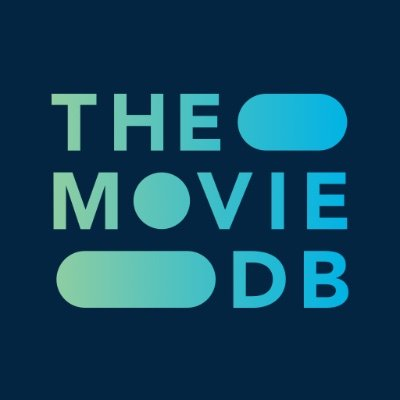
<center>Source: (https://pbs.twimg.com/profile_images/1243623122089041920/gVZIvphd.jpg)</center>



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
For this project I chose the TMDB dataset for investigation and analysis. This dataset has more than 10k movies and consists of following features:

id	
imdb_id	
popularity	
budget	
revenue	
original_title	
cast	
homepage	
director	
tagline	
keywords	
overview	
runtime	
genres	
production_companies	
release_date	
vote_count	
vote_average	
release_year	
budget_adj	
revenue_adj

The Research Questions for analysis purpose are:
1. Top 5 Movies of All Time According to Revenue and Profit Earned
2. Top 5 Movies As Per the Viewers Votes
3. Highest Revenue Movies Properties
4. Profit Earned from the Movies Each Year
5. Most Appeared Actors/Actresses in the Movies
6. Genre Trend of Movies
7. Popular Genres Trend
8. Running Time of the Movies

In [1]:
# Importing all the packages used for the data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
The movie data is loaded and some of the general properties of the data checked for further cleaning and investigation.

### General Properties

In [2]:
tmdb_df = pd.read_csv('tmdb_movies.csv')
tmdb_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
tmdb_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
tmdb_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
tmdb_df.shape

(10866, 21)

### Data Cleaning
Data is cleaned by dropping unwanted columns which are not helpful in data investigation as well as null values of the data has been filled with Unknown as all of the null or NaN values are data type of object(string) while the data with 0 values is replaced by NaN using numpy. The data type of release year is changed from object to datetime format.

In [7]:
tmdb_df.drop(['homepage', 'tagline', 'overview', 'production_companies', 'imdb_id', 'keywords'], axis=1, inplace=True)

In [8]:
tmdb_df = tmdb_df.fillna("Unknown")
tmdb_df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [9]:
# replacing the data with 0 values with NaN
tmdb_df.replace(0, np.NaN, inplace=True);

In [10]:
tmdb_df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [11]:
tmdb_df.duplicated().sum()

1

In [12]:
tmdb_df.drop_duplicates(inplace=True)
tmdb_df.duplicated().sum()

0

In [13]:
# Changing the release_date column type from string to datetime.
tmdb_df['release_date'] = pd.to_datetime(tmdb_df.release_date)
tmdb_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis
All the above mentioned research questions in Introduction section is analysed thoroughly.

### Top 5 Movies of All Time According to Revenue and Profit Earned

In [14]:
top_5 = tmdb_df.nlargest(5, 'revenue')['original_title']
top_5 = pd.DataFrame(top_5)

In [15]:
top_5

,original_title
1386,Avatar
3,Star Wars: The Force Awakens
5231,Titanic
4361,The Avengers
0,Jurassic World


In [16]:
# Calculating Profit and inserting it into the dataframe
tmdb_df['profit'] = tmdb_df['revenue'] - tmdb_df['budget']

In [17]:
top_5_profit = tmdb_df.nlargest(5, 'profit')['original_title']
top_5_profit = pd.DataFrame(top_5_profit)
top_5_profit

,original_title
1386,Avatar
3,Star Wars: The Force Awakens
5231,Titanic
0,Jurassic World
4,Furious 7


### Top 5 Movies As Per the Viewers Votes

In [18]:
top_5_voted = tmdb_df.nlargest(5, 'vote_count')['original_title']
top_5_voted = pd.DataFrame(top_5_voted)
top_5_voted

,original_title
1919,Inception
4361,The Avengers
1386,Avatar
2875,The Dark Knight
4364,Django Unchained


### Highest Revenue Movies Properties
For highest revenue movies I made a dataframe of movies list with the help of revenue column which are greater than equal to the mean of revenue.

In [19]:
high_rev_mov = pd.DataFrame(tmdb_df.query('revenue >= revenue.mean()'))
high_rev_mov.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08


In [20]:
high_rev_mov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,1328.000000,1328.000000,1.295000e+03,1.328000e+03,1328.000000,1328.000000,1328.000000,1328.000000,1.295000e+03,1.328000e+03,1.295000e+03
mean,37455.898343,2.038197,6.944021e+07,2.618895e+08,114.825301,1121.176958,6.364684,2003.056476,7.821209e+07,3.216012e+08,1.956353e+08
std,64882.192818,2.100792,5.297913e+07,2.310465e+08,26.146210,1225.663674,0.703299,9.697332,5.320127e+07,2.818345e+08,2.063661e+08
min,11.000000,0.073493,1.130000e+02,8.928991e+07,72.000000,10.000000,4.100000,1961.000000,2.248029e+02,8.357833e+07,-1.657101e+08
25%,1816.000000,0.979581,3.000000e+07,1.224163e+08,99.000000,331.750000,5.900000,1998.000000,3.691123e+07,1.479500e+08,8.049071e+07
50%,9575.000000,1.495858,5.500000e+07,1.792393e+08,112.000000,683.000000,6.400000,2005.000000,6.667438e+07,2.245569e+08,1.283352e+08
75%,41513.500000,2.392405,9.200000e+07,3.069756e+08,126.250000,1407.500000,6.900000,2011.000000,1.065012e+08,3.931431e+08,2.336235e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.544506e+09


### Profit Earned from Movies Each Year

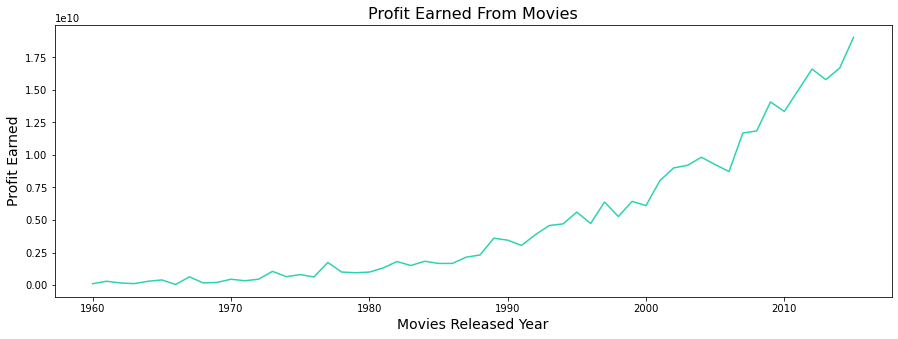

In [21]:
plt.figure(figsize=(15,5));
profit_earned = tmdb_df.groupby('release_year')['profit'].sum()
plt.plot(profit_earned, color="#2cd3b0");
plt.title('Profit Earned From Movies', fontsize=16);
plt.xlabel('Movies Released Year', fontsize= 14);
plt.ylabel('Profit Earned', fontsize=14);


#### Calculating the best and worst profitable year

In [22]:
best_year = tmdb_df.groupby('release_year')['profit'].sum().idxmax()
worst_year = tmdb_df.groupby('release_year')['profit'].sum().idxmin()

print ('The Best profitable year was:' , best_year)
print ('The worst profitable year was:', worst_year)

The Best profitable year was: 2015
The worst profitable year was: 1966


#### Function to split and caclulate the column values for mostly appeared actor/actress in the movies as well as the most popular genres

In [23]:
def column_name(column):
    split = tmdb_df[column].str.cat(sep='|')
    split= pd.Series(split.split('|'))
    values_num = split.value_counts()
    return values_num

### Most Appeared Actors/Actresses in the Movies

In [24]:
cast = column_name('cast')
cast.head()

Unknown              76
Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
dtype: int64

Due to some of the missing values filled with Unknown it is not possible to predict the actual most appeared actor/actresses while beside that Robert De Niro and Samuel L. Jackson are most appeared actors with a difference on only one movie.

### Most Popular Genres in Movies

In [25]:
genre = column_name('genres')
genre.head()

Drama       4760
Comedy      3793
Thriller    2907
Action      2384
Romance     1712
dtype: int64

In [26]:
# sorting the genre in ascending order for plotting.
genre = genre.sort_values(ascending=True)

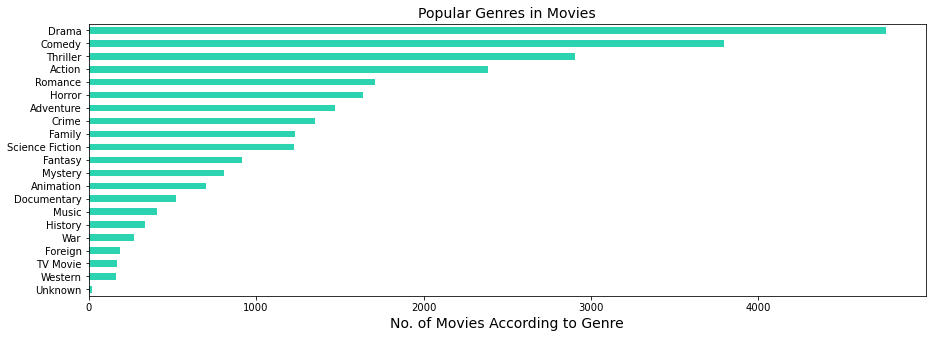

In [27]:
plt.figure(figsize=(15,5));
genre.plot(color="#2cd3b0", kind="barh");
plt.title('Popular Genres in Movies', fontsize=14);
plt.xlabel('No. of Movies According to Genre', fontsize=14);

The above horizontal bar plot shows that most popular genre of all time is Drama with more than 5000 movies followed by Comedy and Thriller.

### Running Time Distribution of the Movies

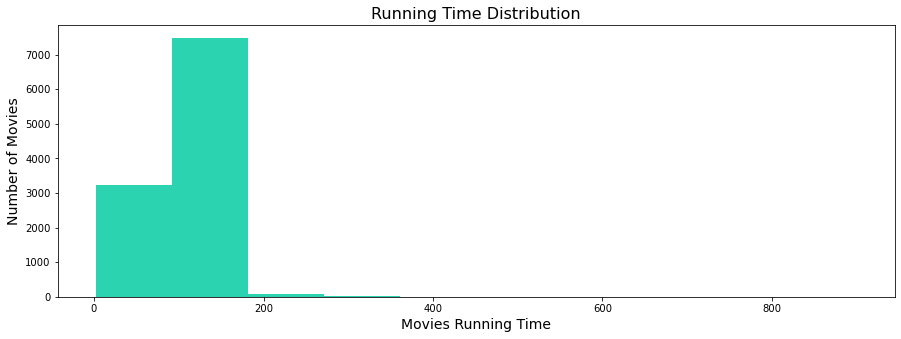

In [28]:
plt.figure(figsize=(15,5));
plt.hist(tmdb_df.runtime, color="#2cd3b0");
plt.title('Running Time Distribution', fontsize=16);
plt.xlabel('Movies Running Time', fontsize= 14);
plt.ylabel('Number of Movies', fontsize=14);


The above histogram shows that the distribution of the movies running time is right skewed.

<a id='conclusions'></a>
## Conclusions
According to the data analysis the top movies in terms of revenue and profit earned are: 
    <ul>
    <li>Avatar</li> 
    <li>Star Wars: The Force Awakens and</li> 
    <li>Titanic</li> 
    </ul>
while as per the viewers votes most popular movies are:
    <ul>
    <li>Inception</li>
    <li>The Avengers and</li> 
    <li>Avatar</li>
    </ul>
The graph of earned profit over time is gradually increasing since 60's while the most profitable and least profitable year are <b>2015</b> and <b>1966</b> according to the plotted graph.

Some of the data was missing due to which it is not possible to properly calculate the most appeared actors/actresses of all time so according to the analysis <b>Robert De Niro</b> and <b>Samuel L. Jackson</b> are close to each other with a difference of only one movie.

The most popular genre among these movies is <b>Drama</b> followed by Comedy and Thriller.

<b>Limitations:</b>
Some of the columns are dropped due to null values as well as NaN values has been replaced by "Unknown" in some rows as well as data with 0 has been replaced by NaN so it may affect the data analysis process.